<a href="https://colab.research.google.com/github/Nitesh2206/python-kernels/blob/master/keras_tf2_digit_recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:
# Connect to kaggle datasets
import os
os.environ['KAGGLE_USERNAME'] = "nitesh2206" # username from the json file 
os.environ['KAGGLE_KEY'] = "b7f779b2ff8c8dd0f69306abbd30d0ad" 
!kaggle competitions download -c digit-recognizer

train_data = pd.read_csv("../content/train.csv.zip")
test_data = pd.read_csv("../content/test.csv.zip")
(train_data.shape,test_data.shape)

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


((42000, 785), (28000, 784))

In [8]:
# get data from mnist and combine both training and test data
data = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()
mnist_train_images = np.concatenate((train_images, test_images))
mnist_train_labels = np.concatenate((train_labels, test_labels))
(mnist_train_images.shape,mnist_train_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step


((70000, 28, 28), (70000,))

In [9]:
# combine data from mnist and competition training for bigger training set
x = np.array(train_data.drop(['label'], axis = 1))
y = np.array(train_data['label'])
test_data = np.array(test_data)

x = x.reshape((x.shape[0], 28, 28))
test_data = test_data.reshape(test_data.shape[0], 28, 28)

x = np.concatenate((x, mnist_train_images))
y = np.concatenate((y, mnist_train_labels))

x = x/255.0
test_data = test_data/255.0

print(x.shape, y.shape, test_data.shape)

(112000, 28, 28) (112000,) (28000, 28, 28)


In [10]:
# split to training and validation set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, shuffle = True)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(100800, 28, 28) (100800,) (11200, 28, 28) (11200,)


In [11]:
# create the model
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation="relu"),
                          keras.layers.Dense(10,activation="softmax")
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# add optimzer and loss function
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [13]:
model.fit(x_train,y_train,epochs=30)

Train on 100800 samples
Epoch 1/30
100800/100800 [==============================] - 9s 94us/sample - loss: 0.2018 - acc: 0.9419
Epoch 2/30
100800/100800 [==============================] - 9s 87us/sample - loss: 0.0782 - acc: 0.9767
Epoch 3/30
100800/100800 [==============================] - 9s 87us/sample - loss: 0.0496 - acc: 0.9849
Epoch 4/30
100800/100800 [==============================] - 9s 87us/sample - loss: 0.0340 - acc: 0.9897
Epoch 5/30
100800/100800 [==============================] - 9s 87us/sample - loss: 0.0261 - acc: 0.9920
Epoch 6/30
100800/100800 [==============================] - 9s 86us/sample - loss: 0.0192 - acc: 0.9940
Epoch 7/30
100800/100800 [==============================] - 9s 87us/sample - loss: 0.0157 - acc: 0.9951
Epoch 8/30
100800/100800 [==============================] - 9s 86us/sample - loss: 0.0124 - acc: 0.9961
Epoch 9/30
100800/100800 [==============================] - 9s 87us/sample - loss: 0.0102 - acc: 0.9968
Epoch 10/30
100800/100800 [=============

In [0]:
prediction = model.predict(x_test)

In [21]:
prediction_classes = model.predict_classes(x_test)
test_data.shape

(28000, 28, 28)

In [22]:
# Accuracy for validation set
accuracy_score(y_test,prediction_classes )

0.9950892857142857

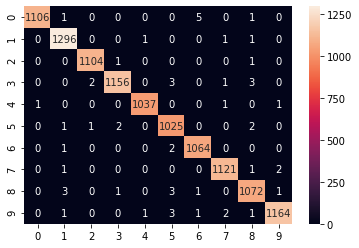

In [23]:
c_mtx = confusion_matrix(y_test,prediction_classes )
sns.heatmap(c_mtx, annot=True, fmt='d')

In [0]:
#create submission.csv for kaggle 
sub_prediction = model.predict_classes(test_data)
sub_prediction = pd.Series(sub_prediction, name = 'Label')
submission = pd.concat([pd.Series(range(1, 28001), name = 'ImageId'), sub_prediction], axis = 1)
submission.to_csv('Submission.csv', index = False)


In [41]:
incorrect_predtns = np.where(y_test!=prediction_classes)[0]
len(incorrect_predtns) # total  number of predictions that went wrong

55

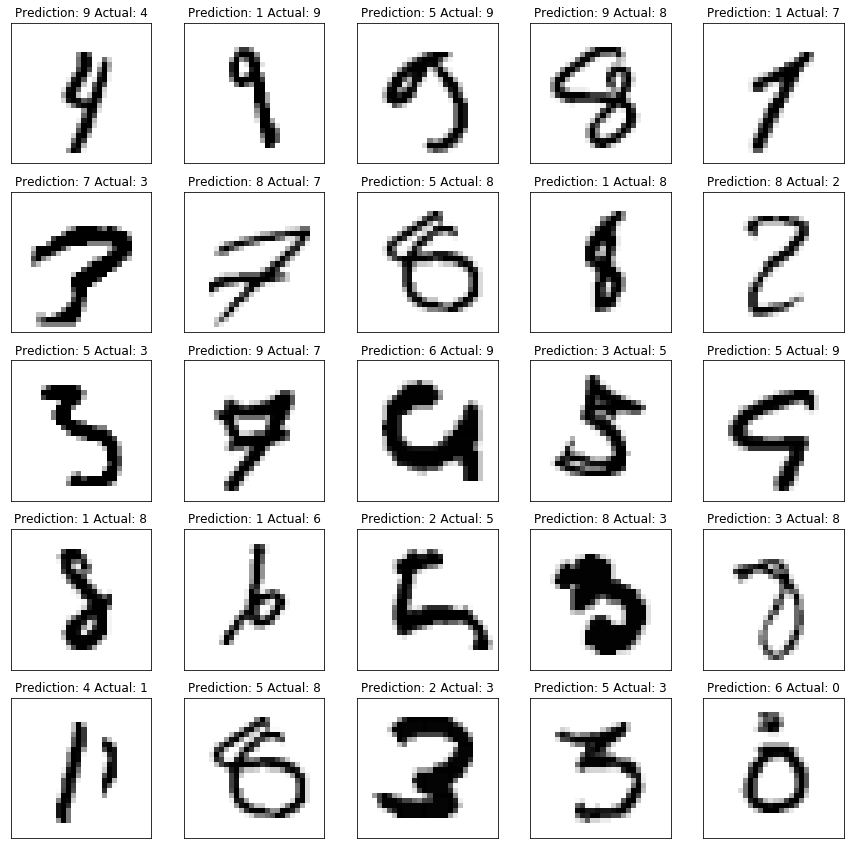

In [80]:
# check the first 25 incorrect predictions
fig, axs = plt.subplots(5, 5,figsize=(15, 15))
for i in range(5):
  for j in range(5):
    
    idx = incorrect_predtns[:25].reshape(5,5)[i,j]
    axs[i, j].imshow((x_test[idx]),cmap=plt.cm.binary)
    axs[i, j].set_title("Prediction: " + str(prediction_classes[idx]) + " Actual: " + str(y_test[idx]))

# clear ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])